## Using the Hyperion files from the Robitaille (2017) YSO SED models

This notebook demonstrates how to use the Hyperion files for the YSO SED models published in Robitaille (2017).

### Format

The [published Hyperion files](https://doi.org/10.5281/zenodo.572233) include a tar file for each set of models. The name of each
model set is composed of several characters that indicate which component is present. The characters, in order, are:

* ``s`` (star)
* ``p`` (passive disk)
* ``p`` (power-law envelope) or ``u`` (Ulrich envelope)
* ``b`` (bipolar cavities)
* ``h`` (inner hole)
* ``m`` (ambient medium)
* ``i`` (interstellar dust).

If a component is absent, a hyphen (``-``) is given instead.

Each tar file expands to give a ``grids-1.1/<model_set>``. To read the Hyperion files, you will need to make sure you have [Hyperion](http://www.hyperion-rt.org) installed. At the time of writing, the easiest way to do this is to use the [Anaconda Python Distribution](https://www.continuum.io/downloads) and to type:

    conda install -c conda-forge hyperion
    
This notebook includes short examples of how to access and visualize the information in the Hyperion files, but you can find more in-depth tutorials in the [Hyperion Documentation](http://docs.hyperion-rt.org/en/stable/tutorials/index.html).

### Reading in density/temperature maps

The density/temperature maps can be accessed from the ``grids-1.1/<model_set>/output/??/*.rtout`` files.

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from hyperion.model import ModelOutput
from hyperion.util.constants import au

Plot the density and temperature in $\theta$ vs $r$ space:

INFO: No density present in output, reading initial density [hyperion.model.model_output]


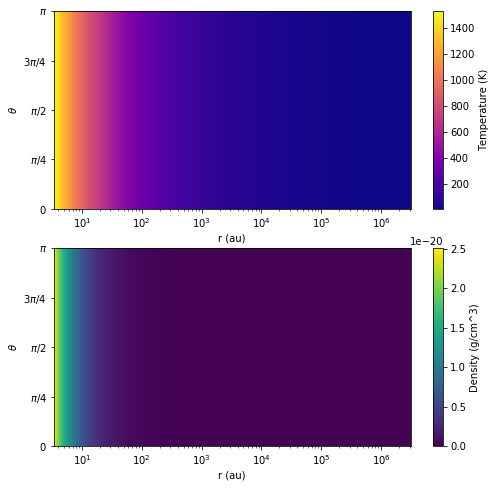

In [16]:
# Read in the model
m = ModelOutput('grids-1.1/s-p-smi/output/a3/a3AdLDnU.rtout')

# Extract the quantities
g = m.get_quantities()

# Get the wall positions for r and theta
rw, tw = g.r_wall / au, g.t_wall

# Make a 2-d grid of the wall positions (used by pcolormesh)
R, T = np.meshgrid(rw, tw)

# Make a plot in (r, theta) space

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(2, 1, 1)
c = ax.pcolormesh(R, T, g['temperature'][0].array[0, :, :], cmap=plt.cm.plasma)
ax.set_xscale('log')
ax.set_xlim(rw[1], rw[-1])
ax.set_ylim(tw[0], tw[-1])
ax.set_xlabel('r (au)')
ax.set_ylabel(r'$\theta$')
ax.set_yticks([np.pi, np.pi * 0.75, np.pi * 0.5, np.pi * 0.25, 0.])
ax.set_yticklabels([r'$\pi$', r'$3\pi/4$', r'$\pi/2$', r'$\pi/4$', r'$0$'])
cb = fig.colorbar(c)
cb.set_label('Temperature (K)')

ax = fig.add_subplot(2, 1, 2)
c = ax.pcolormesh(R, T, g['density'][0].array[0, :, :], cmap=plt.cm.viridis)
ax.set_xscale('log')
ax.set_xlim(rw[1], rw[-1])
ax.set_ylim(tw[0], tw[-1])
ax.set_xlabel('r (au)')
ax.set_ylabel(r'$\theta$')
ax.set_yticks([np.pi, np.pi * 0.75, np.pi * 0.5, np.pi * 0.25, 0.])
ax.set_yticklabels([r'$\pi$', r'$3\pi/4$', r'$\pi/2$', r'$\pi/4$', r'$0$'])
cb = fig.colorbar(c)
cb.set_label('Density (g/cm^3)')

### Reading in SEDs

If an ``_sed.rtout`` or ``_sed_noscat.rtout`` file is present, it should be used to extract the SED from, otherwise the plain ``.rtout`` file can be used. The following example shows how to extract the total SED and the SEDs for each component (source vs dust and direct vs scattered) emission:

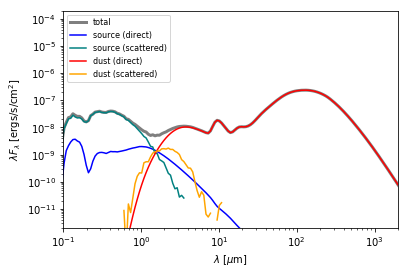

In [24]:
import matplotlib.pyplot as plt

from hyperion.model import ModelOutput
from hyperion.util.constants import pc

m = ModelOutput('grids-1.1/s-p-smi/output/a3/a3AdLDnU_sed.rtout')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Total SED
sed = m.get_sed(inclination=0, aperture=-1, distance=300 * pc)
ax.loglog(sed.wav, sed.val, color='black', lw=3, alpha=0.5, label='total')

# Direct stellar photons
sed = m.get_sed(inclination=0, aperture=-1, distance=300 * pc,
                       component='source_emit')
ax.loglog(sed.wav, sed.val, color='blue', label='source (direct)')

# Scattered stellar photons
sed = m.get_sed(inclination=0, aperture=-1, distance=300 * pc,
                       component='source_scat')
ax.loglog(sed.wav, sed.val, color='teal', label='source (scattered)')

# Direct dust photons
sed = m.get_sed(inclination=0, aperture=-1, distance=300 * pc,
                       component='dust_emit')
ax.loglog(sed.wav, sed.val, color='red', label='dust (direct)')

# Scattered dust photons
sed = m.get_sed(inclination=0, aperture=-1, distance=300 * pc,
                       component='dust_scat')
ax.loglog(sed.wav, sed.val, color='orange', label='dust (scattered)')

ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_ylabel(r'$\lambda F_\lambda$ [ergs/s/cm$^2$]')
ax.set_xlim(0.1, 2000.)
ax.set_ylim(2.e-12, 2.e-4)

ax.legend(loc=2, fontsize=8);

and the following example shows how to extract the linear polarization along with uncertainties:

/Users/tom/miniconda3/envs/dev/lib/python3.6/site-packages/hyperion/model/model_output.py:67: RuntimeWarning: invalid value encountered in true_divide
  np.divide(Qs, Is, out=Qs)
/Users/tom/miniconda3/envs/dev/lib/python3.6/site-packages/hyperion/model/model_output.py:68: RuntimeWarning: invalid value encountered in true_divide
  np.divide(Us, Is, out=Us)


(0.1, 20)

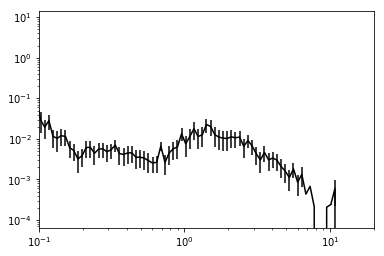

In [44]:
sed = m.get_sed(inclination=0, aperture=-1, stokes='linpol', uncertainties=True)
ax = plt.subplot(1, 1, 1)
ax.errorbar(sed.wav, sed.val, yerr=sed.unc, color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1, 20)